In [48]:
# Importation des librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Prédiction de victoire dans les parties d'échecs en ligne: analyse de données et de machine learning

Bienvenue dans notre projet d'analyse de données sur les parties d'échecs en ligne. L'objectif de ce projet est de prédire la victoire des blancs ou des noirs dans une partie d'échecs en se basant sur des données historiques de parties en ligne.

Pour ce faire, nous utiliserons un jeu de données Kaggle "Online Chess Games" contenant des informations sur plus de 20 000 parties d'échecs en ligne. Nous allons explorer ce jeu de données, effectuer une analyse exploratoire pour comprendre les tendances et les caractéristiques des parties jouées, et construire un modèle de machine learning pour prédire le résultat de chaque partie.

Dans l'ensemble, ce projet est conçu pour aider les joueurs d'échecs en ligne à mieux comprendre les facteurs qui influencent le résultat d'une partie et à améliorer leur stratégie de jeu.

In [49]:
dataframe = pd.read_csv('chess_games.csv', 
                        usecols=["rated", "turns", "victory_status", "winner", "white_rating", "black_rating", "moves", "opening_fullname", "opening_shortname", "opening_variation"])

dataframe.head()

,rated,turns,victory_status,winner,white_rating,black_rating,moves,opening_fullname,opening_shortname,opening_variation
0,False,13,Out of Time,White,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,Slav Defense: Exchange Variation,Slav Defense,Exchange Variation
1,True,16,Resign,Black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,Kennedy Variation
2,True,61,Mate,White,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,King's Pawn Game: Leonardis Variation,King's Pawn Game,Leonardis Variation
3,True,61,Mate,White,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,Zukertort Variation
4,True,95,Mate,White,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,Philidor Defense,Philidor Defense,NaN


In [50]:
dataframe['rated'] = dataframe['rated'].replace({True: 'Classé', False: 'Non classé'})
dataframe['victory_status'] = dataframe['victory_status'].replace({
    'Resign': 'Forfait',
    'Mate': 'Échec et mat',
    'Draw': 'Match nul',
    'Out of Time': 'Manque de temps'
})
dataframe['winner'] = dataframe['winner'].replace({
    'White': 'Blanc',
    'Black': 'Noir',
    'Draw': 'Match nul',
})

In [51]:
dataframe.head()

,rated,turns,victory_status,winner,white_rating,black_rating,moves,opening_fullname,opening_shortname,opening_variation
0,Non classé,13,Manque de temps,Blanc,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,Slav Defense: Exchange Variation,Slav Defense,Exchange Variation
1,Classé,16,Forfait,Noir,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,Kennedy Variation
2,Classé,61,Échec et mat,Blanc,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,King's Pawn Game: Leonardis Variation,King's Pawn Game,Leonardis Variation
3,Classé,61,Échec et mat,Blanc,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,Zukertort Variation
4,Classé,95,Échec et mat,Blanc,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,Philidor Defense,Philidor Defense,NaN


#### Les parties classées et non classées

Le jeu de données "Online Chess Games" contient des informations sur deux types de parties d'échecs en ligne: les parties classées et les parties non classées.

Les parties classées sont des parties qui affectent le classement du joueur sur la plateforme de jeu en ligne. Dans ces parties, les joueurs sont jumelés en fonction de leur niveau de compétence, et le résultat de la partie affecte le classement de chaque joueur. Les parties classées sont souvent considérées comme plus compétitives que les parties non classées.

D'un autre côté, les parties non classées ne sont pas utilisées pour affecter le classement du joueur. Ces parties sont souvent jouées pour le plaisir ou pour pratiquer de nouvelles stratégies sans le stress de perdre des points de classement.

Dans ce projet, nous allons nous concentrer sur les parties classées, car ces parties sont considérées comme plus compétitives et sont utilisées pour affecter le classement des joueurs en ligne. Par conséquent, nous ne prendrons pas en compte les parties non classées dans notre analyse et notre modèle de prédiction.

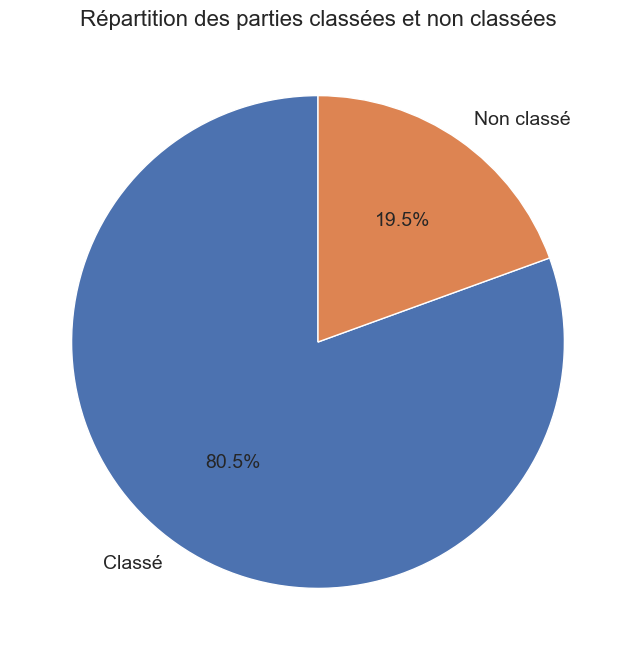

In [52]:
def plot_rated_pie_chart(dataframe):
    rated_counts = dataframe['rated'].value_counts()

    labels = rated_counts.index.tolist()

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(rated_counts, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})

    ax.set_title('Répartition des parties classées et non classées', fontsize=16)

    plt.show()

plot_rated_pie_chart(dataframe)

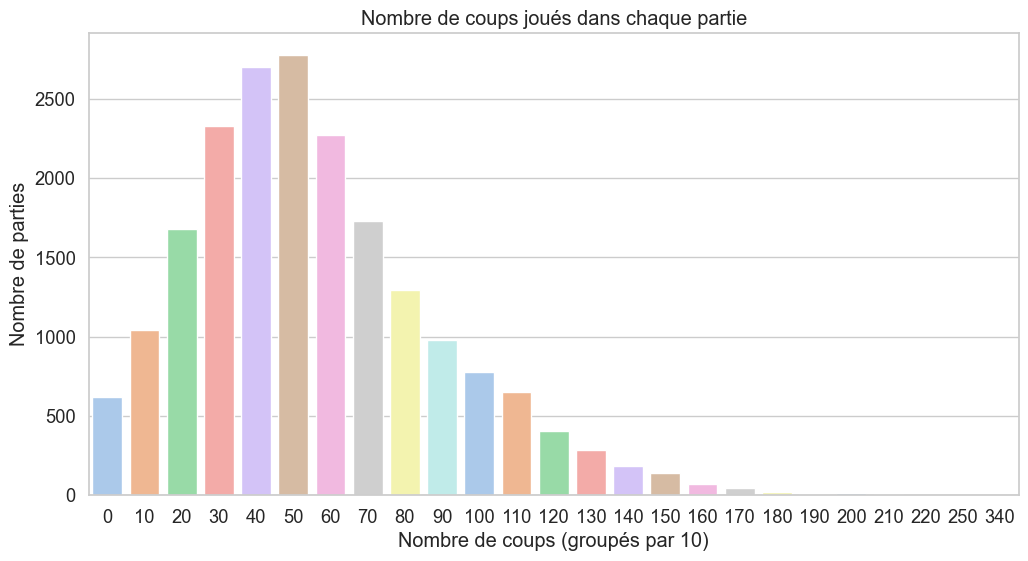

In [53]:
def plot_num_moves_bar_chart(dataframe):
    dataframe['num_moves'] = dataframe['moves'].apply(lambda x: len(x.split()))
    num_moves = dataframe['num_moves'].value_counts().sort_index()
    
    num_moves_grouped = num_moves.groupby(num_moves.index // 10 * 10).sum()
    
    sns.set_style("whitegrid")
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.barplot(x=num_moves_grouped.index, y=num_moves_grouped.values, palette="pastel")
    ax.set_title('Nombre de coups joués dans chaque partie')
    ax.set_xlabel('Nombre de coups (groupés par 10)')
    ax.set_ylabel('Nombre de parties')
    
    plt.show()

plot_num_moves_bar_chart(dataframe)

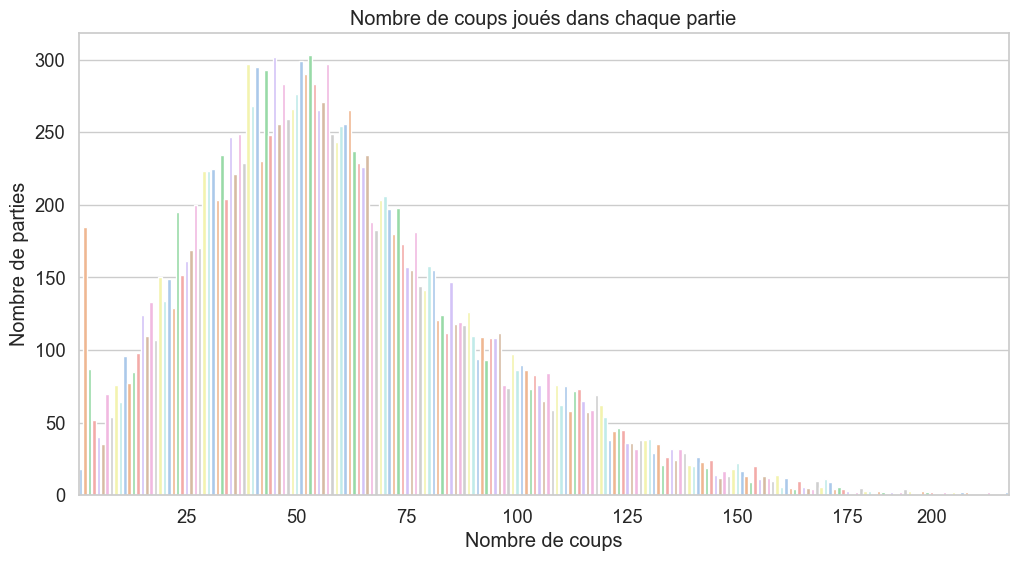

In [54]:
def plot_num_moves_bar_chart(dataframe):
    dataframe['num_moves'] = dataframe['moves'].apply(lambda x: len(x.split()))
    num_moves = dataframe['num_moves'].value_counts().sort_index()
    
    sns.set_style("whitegrid")
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.barplot(x=num_moves.index, y=num_moves.values, palette="pastel")
    ax.set_title('Nombre de coups joués dans chaque partie')
    ax.set_xlabel('Nombre de coups')
    ax.set_ylabel('Nombre de parties')
    
    labels = [label if label % 25 == 0 else '' for label in num_moves.index]
    ax.set_xticklabels(labels)
    
    plt.show()

plot_num_moves_bar_chart(dataframe)

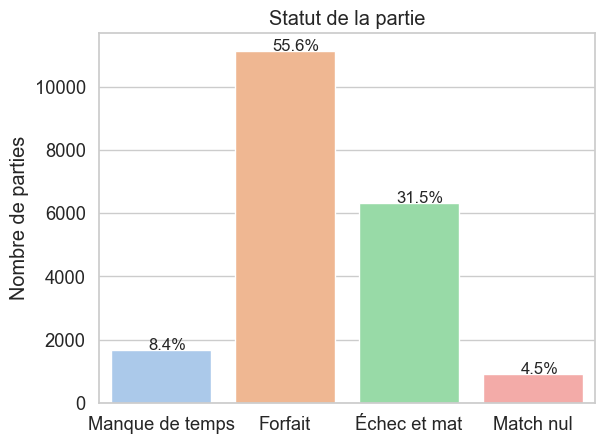

In [55]:
def plot_victory_status_pie_chart(dataframe):
    victory_status = dataframe['victory_status'].value_counts()
    
    sns.set_style("whitegrid")
    
    fig, ax = plt.subplots()
    ax = sns.countplot(x='victory_status', data=dataframe, palette="pastel")
    ax.set_title('Statut de la partie')
    ax.set_xlabel('')
    ax.set_ylabel('Nombre de parties')
    
    total = len(dataframe)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)
    
    plt.show()

plot_victory_status_pie_chart(dataframe)

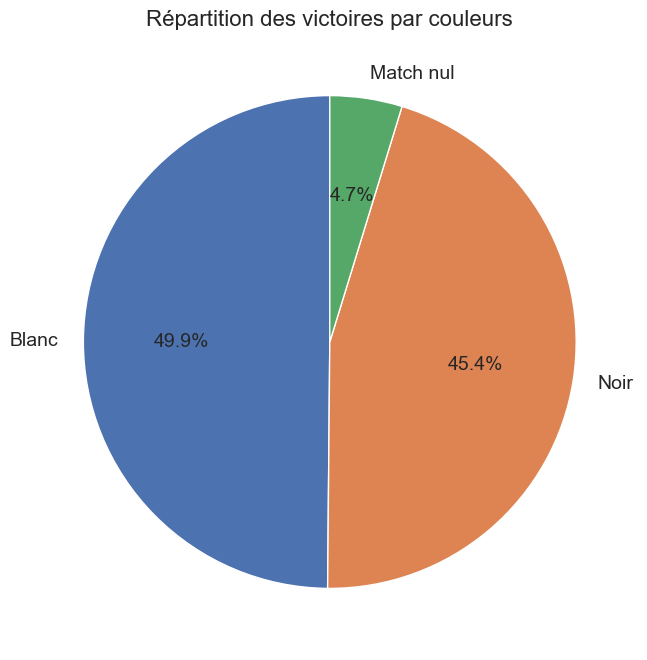

In [56]:
def plot_winner_pie_chart(dataframe):
    winner_counts = dataframe['winner'].value_counts()

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(winner_counts, labels=winner_counts.index, 
           autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
    ax.set_title('Répartition des victoires par couleurs', fontsize=16)
    
    plt.show()

plot_winner_pie_chart(dataframe)

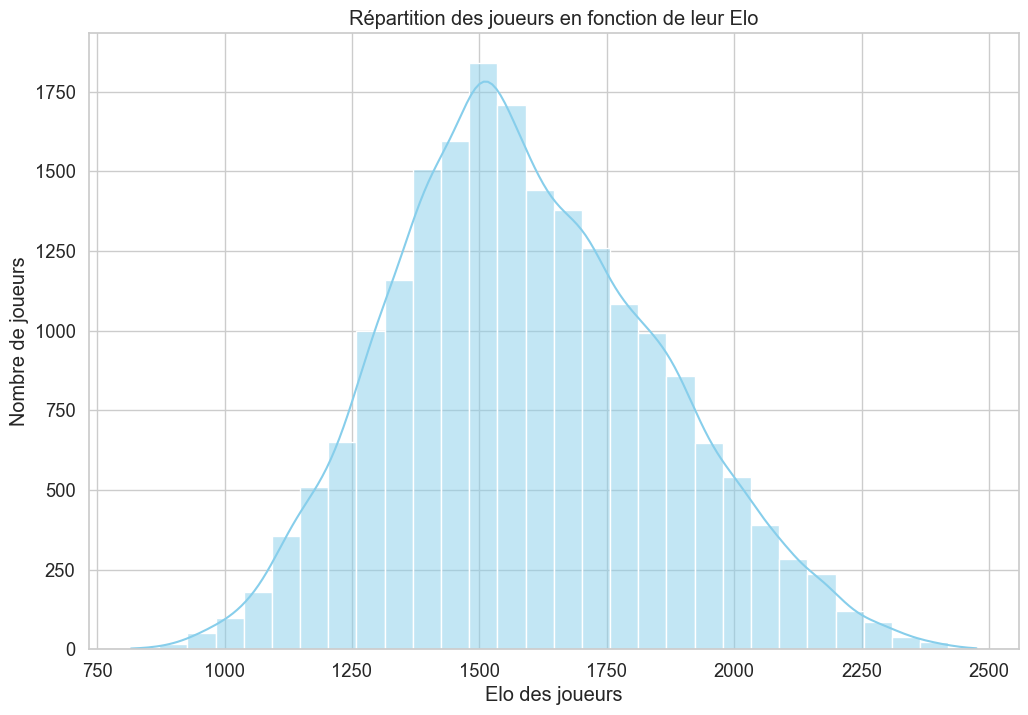

In [57]:
def plot_rating_barplot(dataframe):
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid", font_scale=1.2)
    
    dataframe['combined_rating'] = (dataframe['white_rating'] + dataframe['black_rating']) / 2
    
    sns.histplot(data=dataframe, x='combined_rating', color='skyblue', kde=True, bins=30)
    plt.title("Répartition des joueurs en fonction de leur Elo")
    plt.xlabel("Elo des joueurs")
    plt.ylabel("Nombre de joueurs")
    
    plt.show()

plot_rating_barplot(dataframe)

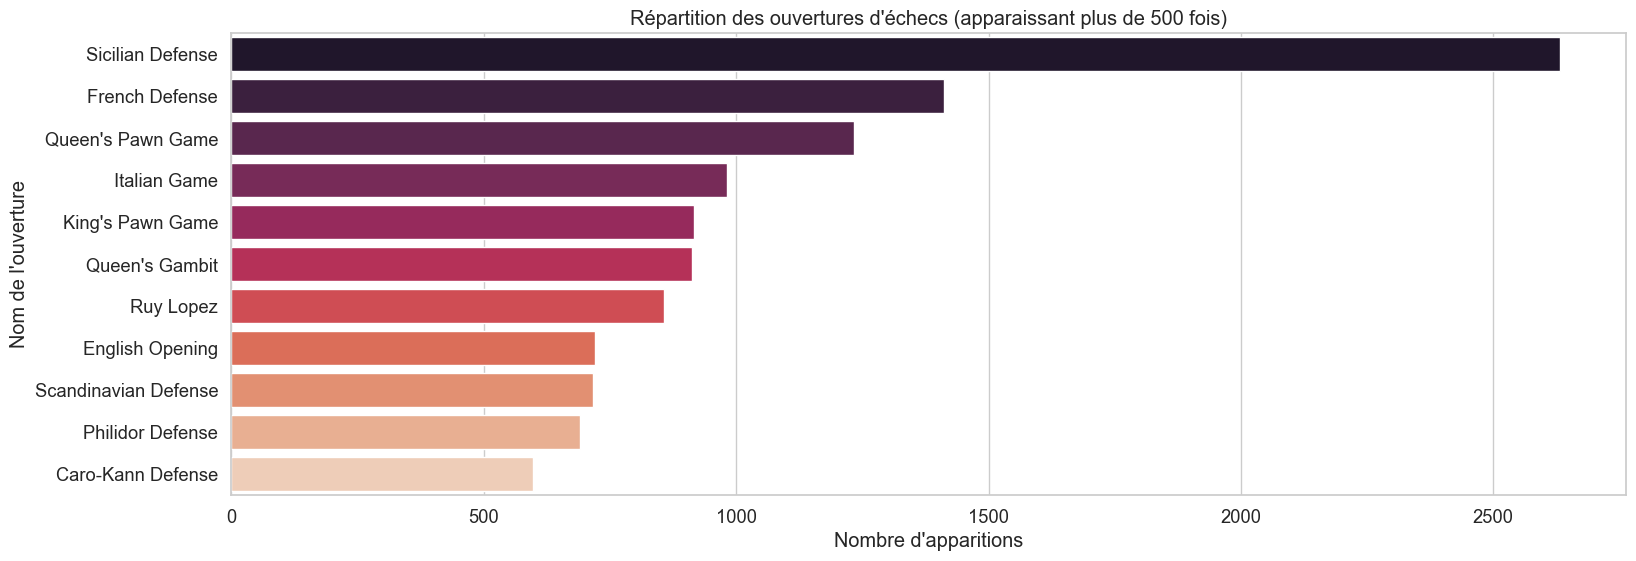

In [58]:
def plot_opening_barplot(dataframe):
    plt.figure(figsize=(18, 6))
    sns.set(style="whitegrid", font_scale=1.2)
    
    opening_counts = dataframe['opening_shortname'].value_counts()

    opening_counts = opening_counts[opening_counts >= 500]
    
    fig = sns.barplot(x=opening_counts, y=opening_counts.index, palette="rocket")
    
    fig.set(ylabel="Nom de l'ouverture", xlabel="Nombre d'apparitions")
    
    plt.title("Répartition des ouvertures d'échecs (apparaissant plus de 500 fois)")
    
    plt.show()

plot_opening_barplot(dataframe)

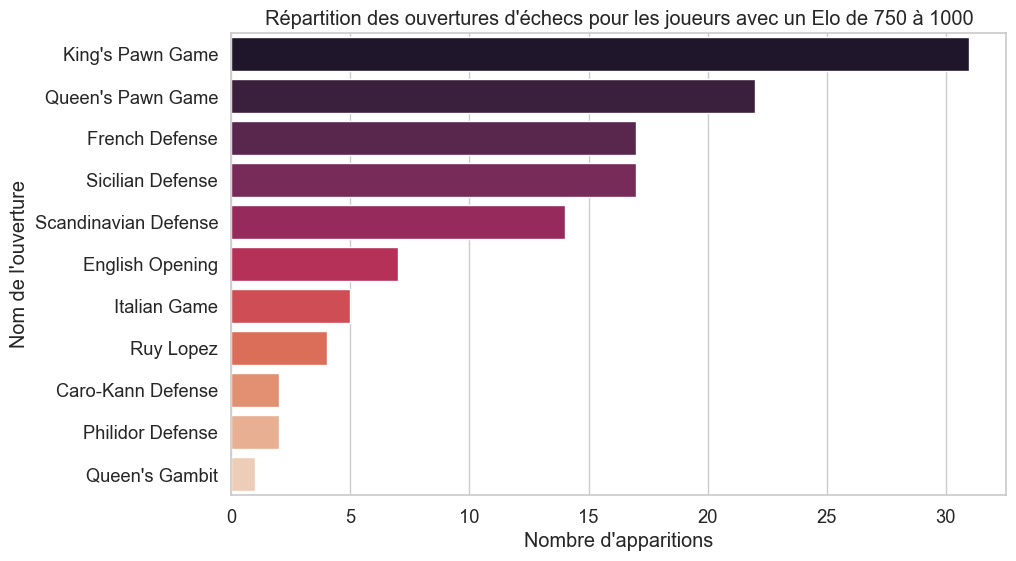

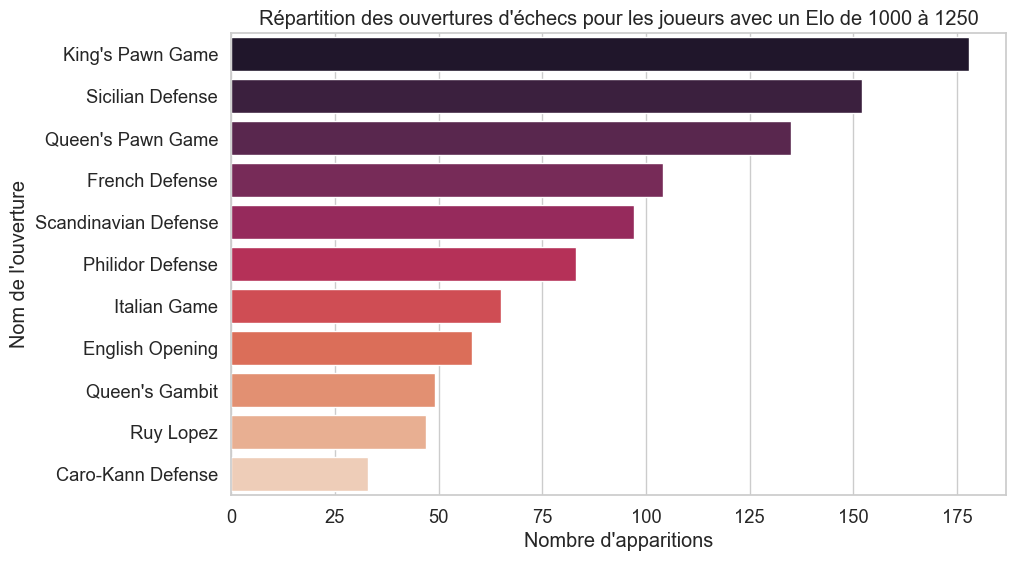

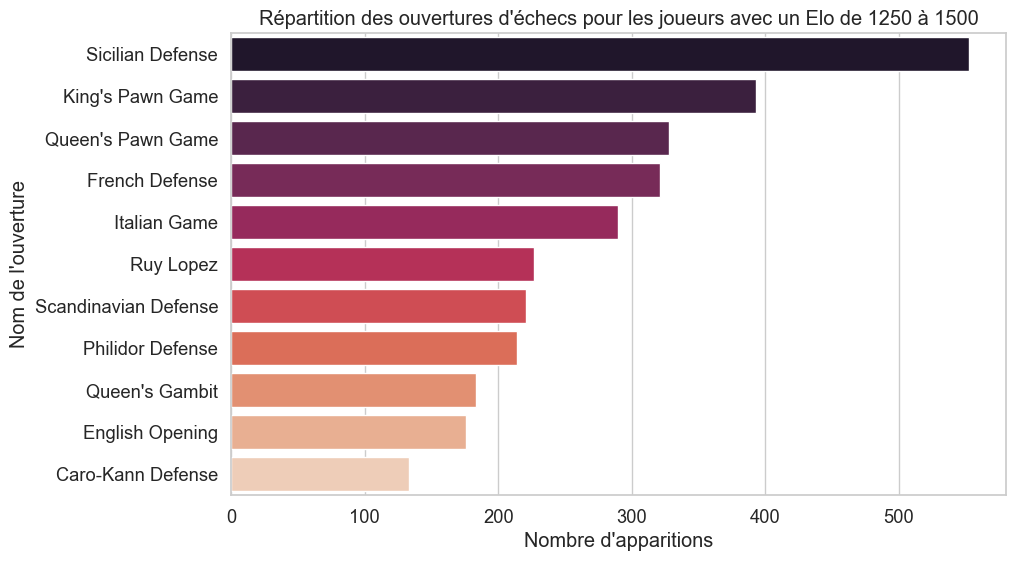

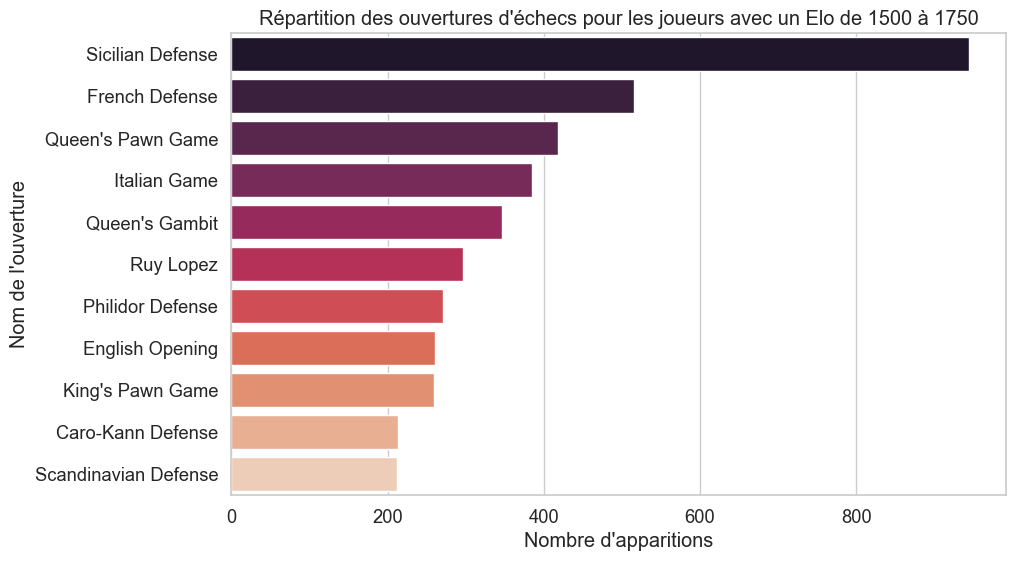

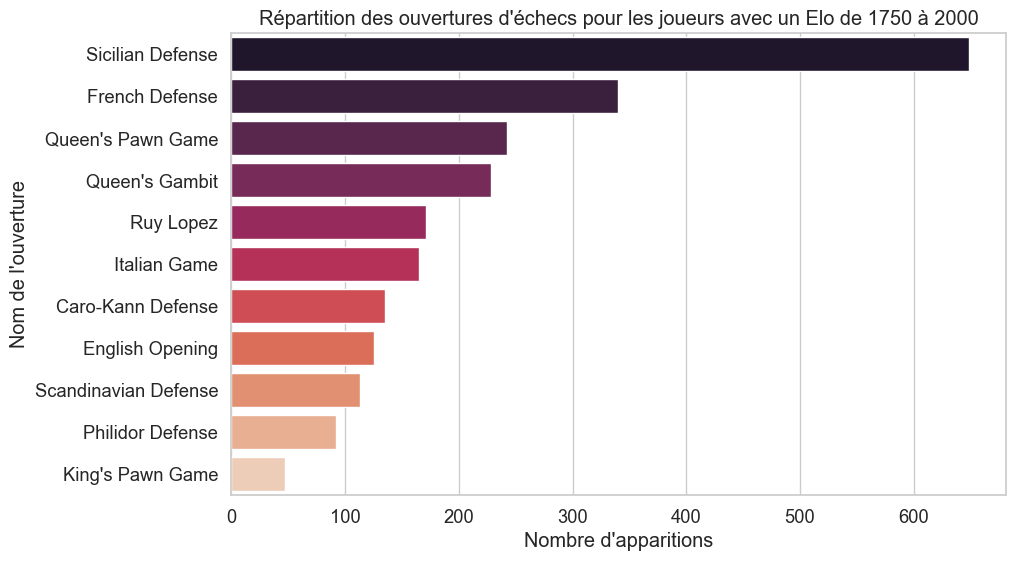

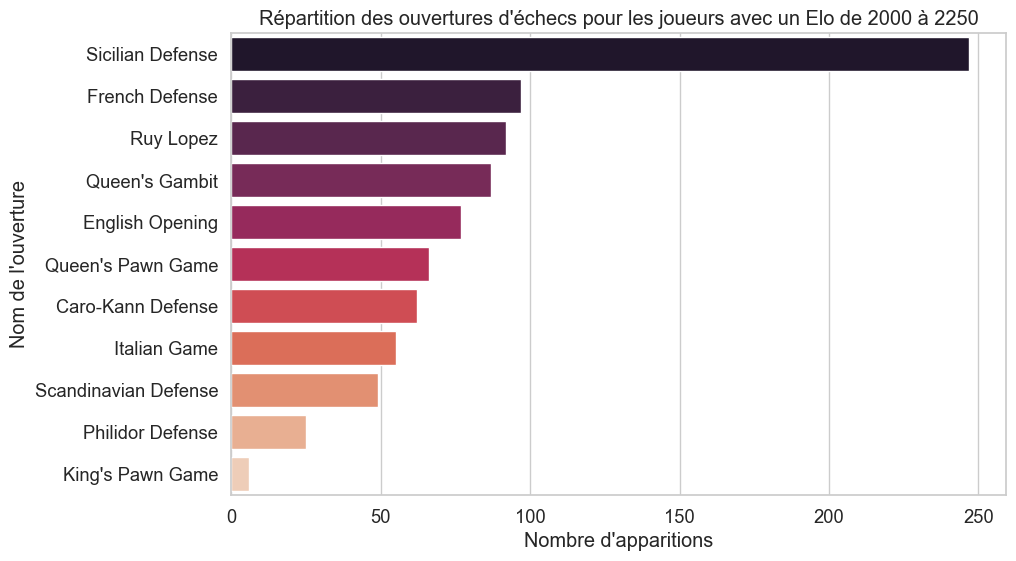

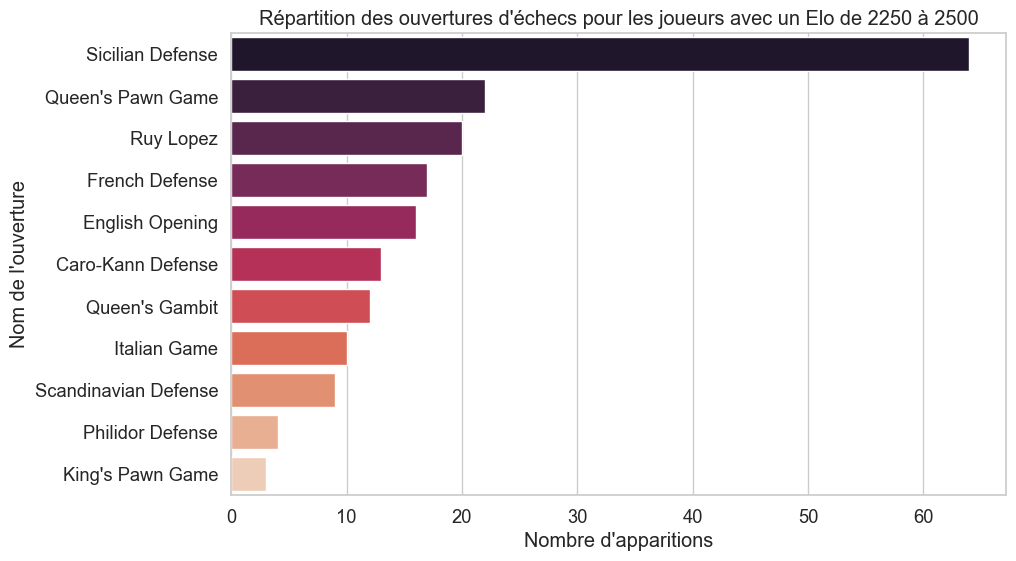

In [59]:
def plot_openings_by_elo(dataframe, elo_levels):
    opening_counts = dataframe['opening_shortname'].value_counts()
    top_openings = opening_counts[opening_counts >= 500].index.tolist()
    
    for elo in elo_levels:
        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid", font_scale=1.2)
        
        df_subset = dataframe[(dataframe['white_rating'] >= elo) & (dataframe['white_rating'] < elo+250) & (dataframe['opening_shortname'].isin(top_openings))]
        opening_counts_subset = df_subset['opening_shortname'].value_counts().reset_index(name='counts')
        
        fig = sns.barplot(x='counts', y='index', data=opening_counts_subset, palette="rocket")
        fig.set(ylabel="Nom de l'ouverture", xlabel="Nombre d'apparitions")
        
        plt.title(f"Répartition des ouvertures d'échecs pour les joueurs avec un Elo de {elo} à {elo+250}")
        
        plt.show()

plot_openings_by_elo(dataframe, [750, 1000, 1250, 1500, 1750, 2000, 2250])